In [110]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report,ConfusionMatrixDisplay, confusion_matrix, accuracy_score

In [111]:
df = pd.read_csv('/content/Impact of Social Media on Mental Health.csv')
df.head()

,1. What is your age?,2. What is your gender?,3. Relationship Status ?,4. What is your Profession?,5. Do you use social media?,6. Which social media platforms do you commonly use?,7. What is the average time you spend on social media every day? (Hour),8. How does using social media typically make you feel ?,9.Do you think social media contributes to feelings of loneliness or isolation?,10. Do you experience feelings of inadequacy or low self-esteem after viewing others posts?,11. Does the news you see on social media affect you emotionally?,"12. On a Scale of 1 to 5 , Do you feel more connected to friends and family because of social media?",13. Do you use social media immediately after waking up or before going to bed?,14. How many hours do you sleep in a day? (In Hours),"15. On a scale of 1 to 5 , Have you ever compared yourself to others on social media? If so, how often?","16. On a scale of 1 to 5, How often do you get distracted by Social media when you are busy doing something?","17. On a scale of 1 to 5, how frequently does your interest in daily activities fluctuate ?","18. What do you think , is Social Media effects on your mental health ?"
0,23,Male,In a relationship,Student,Yes,"Facebook, Instagram, YouTube",3,Indifferent,Sometimes,Sometimes,Yes,3,Yes,9,2,1,2,Yes
1,22,Female,Single,Student,Yes,"Facebook, YouTube",4,Stressed,Yes,Sometimes,Yes,1,Yes,9,3,5,5,Yes
2,23,Female,Single,Student,Yes,"Facebook, YouTube",4,Happy,Sometimes,Sometimes,Sometimes,4,Yes,8,3,4,5,No
3,23,Female,Married,Student,Yes,"Facebook, Instagram, YouTube, SnapChat",4,Happy,Yes,No,Yes,3,Yes,6,2,3,3,Yes
4,24,Male,Single,Student,Yes,"Facebook, Instagram, YouTube",5,Stressed,No,No,Sometimes,2,Yes,9,3,4,2,Yes


1. Preprosessing

In [112]:
df.columns

Index(['1. What is your age?', '2. What is your gender? ',
       '3. Relationship Status ?', '4. What is your Profession?',
       '5. Do you use social media?',
       '6. Which social media platforms do you commonly use?',
       '7. What is the average time you spend on social media every day? (Hour)',
       '8. How does using social media typically make you feel ?',
       '9.Do you think social media contributes to feelings of loneliness or isolation?',
       '10. Do you experience feelings of inadequacy or low self-esteem after viewing others posts?',
       '11. Does the news you see on social media affect you emotionally?',
       '12. On a Scale of 1 to 5 , Do you feel more connected to friends and family because of social media?',
       '13. Do you use social media immediately after waking up or before going to bed?',
       '14. How many hours do you sleep in a day? (In Hours)',
       '15. On a scale of 1 to 5 , Have you ever compared yourself to others on social media?

1.1 Column names renaming

In [113]:
column_names = {'1. What is your age?' : 'age',
                '2. What is your gender? ' : 'gender',
       '3. Relationship Status ?' : 'relationship',
       '4. What is your Profession?': 'occupation',
       '5. Do you use social media?' :'social_media_use',
       '6. Which social media platforms do you commonly use?' : 'platforms',
       '7. What is the average time you spend on social media every day? (Hour)' : 'avg_time_per_day',
       '8. How does using social media typically make you feel ?':'feeling',
       '9.Do you think social media contributes to feelings of loneliness or isolation?':'feel_lonely',
       '10. Do you experience feelings of inadequacy or low self-esteem after viewing others posts?':'self_esteem',
       '11. Does the news you see on social media affect you emotionally?':'affects_on_emotion',
       '12. On a Scale of 1 to 5 , Do you feel more connected to friends and family because of social media?':'social_media_connection',
       '13. Do you use social media immediately after waking up or before going to bed?':'use_immediate',
       '14. How many hours do you sleep in a day? (In Hours)':'sleeping_time',
       '15. On a scale of 1 to 5 , Have you ever compared yourself to others on social media? If so, how often?' :'comparism',
       '16. On a scale of 1 to 5,   How often do you get distracted by Social media when you are busy doing something?':'distracted',
       '17. On a scale of 1 to 5, how frequently does your interest in daily activities fluctuate ?':'daily_activities',
       '18. What do you think , is Social Media effects on your mental health ?':'mental_health'}

In [114]:
df.rename(columns=column_names, inplace=True)
df.head()

,age,gender,relationship,occupation,social_media_use,platforms,avg_time_per_day,feeling,feel_lonely,self_esteem,affects_on_emotion,social_media_connection,use_immediate,sleeping_time,comparism,distracted,daily_activities,mental_health
0,23,Male,In a relationship,Student,Yes,"Facebook, Instagram, YouTube",3,Indifferent,Sometimes,Sometimes,Yes,3,Yes,9,2,1,2,Yes
1,22,Female,Single,Student,Yes,"Facebook, YouTube",4,Stressed,Yes,Sometimes,Yes,1,Yes,9,3,5,5,Yes
2,23,Female,Single,Student,Yes,"Facebook, YouTube",4,Happy,Sometimes,Sometimes,Sometimes,4,Yes,8,3,4,5,No
3,23,Female,Married,Student,Yes,"Facebook, Instagram, YouTube, SnapChat",4,Happy,Yes,No,Yes,3,Yes,6,2,3,3,Yes
4,24,Male,Single,Student,Yes,"Facebook, Instagram, YouTube",5,Stressed,No,No,Sometimes,2,Yes,9,3,4,2,Yes


1.2 Finding Null value and Describe Dataset

In [115]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 518 entries, 0 to 517
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   age                      518 non-null    int64 
 1   gender                   518 non-null    object
 2   relationship             518 non-null    object
 3   occupation               518 non-null    object
 4   social_media_use         518 non-null    object
 5   platforms                518 non-null    object
 6   avg_time_per_day         518 non-null    int64 
 7   feeling                  518 non-null    object
 8   feel_lonely              518 non-null    object
 9   self_esteem              518 non-null    object
 10  affects_on_emotion       518 non-null    object
 11  social_media_connection  518 non-null    int64 
 12  use_immediate            518 non-null    object
 13  sleeping_time            518 non-null    int64 
 14  comparism                518 non-null    i

In [116]:
df.describe()

,age,avg_time_per_day,social_media_connection,sleeping_time,comparism,distracted,daily_activities
count,518.000000,518.000000,518.000000,518.000000,518.000000,518.000000,518.000000
mean,33.913127,3.235521,2.897683,6.650579,2.706564,2.694981,2.888031
std,15.515082,1.118913,1.138034,1.612185,1.199127,1.129700,1.176417
min,7.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,23.000000,2.000000,2.000000,6.000000,2.000000,2.000000,2.000000
50%,30.000000,3.000000,3.000000,7.000000,3.000000,3.000000,3.000000
75%,43.000000,4.000000,4.000000,8.000000,3.750000,3.000000,4.000000
max,90.000000,5.000000,5.000000,12.000000,5.000000,5.000000,5.000000


In [117]:
df.social_media_use.value_counts()

,count
social_media_use,
Yes,494
No,24


In [118]:
df.mental_health.value_counts()

,count
mental_health,
Yes,263
No,254
No,1


1.2 Finding which platfrom mostly used

/tmp/ipython-input-1945218729.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=platform_counts, x='Platform', y='Count', ax=ax, palette='viridis')


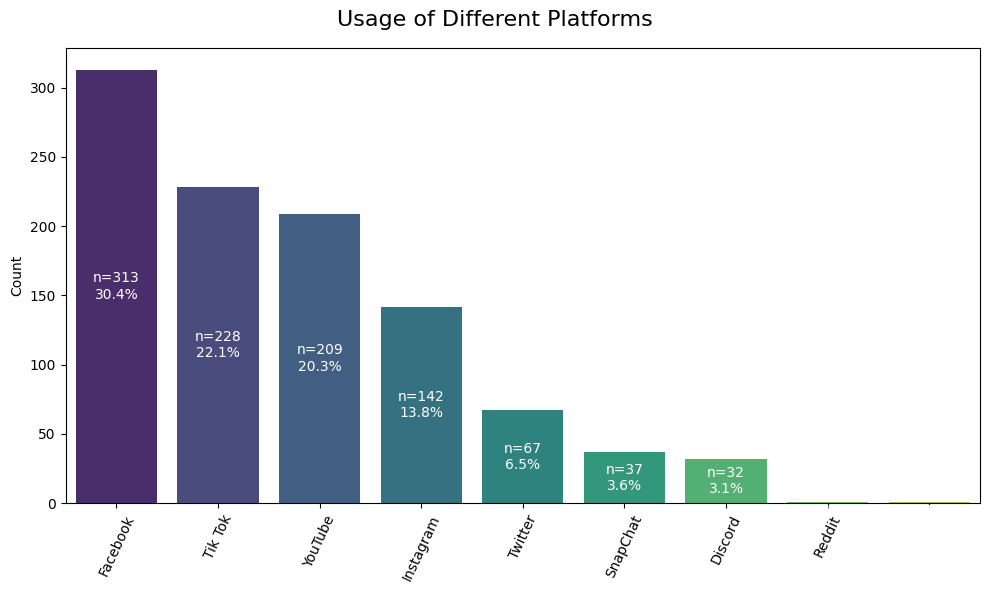

In [119]:
df_filtered = df[df['social_media_use'] == 'Yes']

# Split multi-platform entries, stack into one column, and count
platform_counts = (
    df_filtered['platforms']
    .str.split(', ', expand=True)
    .stack()
    .value_counts()
    .reset_index()
)
platform_counts.columns = ['Platform', 'Count']

# Total for percentage calculation
maxval = platform_counts['Count'].sum()

# Add percentage column
platform_counts['Percentage'] = (platform_counts['Count'] / maxval) * 100

# Plot
fig, ax = plt.subplots(figsize=(10,6))
sns.barplot(data=platform_counts, x='Platform', y='Count', ax=ax, palette='viridis')

fig.suptitle("Usage of Different Platforms", fontsize=16)
ax.set_xlabel("")
ax.set_ylabel("Count")
ax.tick_params(axis='x', rotation=65)

# Annotate bars
for i, row in platform_counts.iterrows():
    ax.annotate(
        text=f"n={row['Count']}\n{row['Percentage']:.1f}%",
        xy=(i, row['Count']/2),
        ha='center', va='center', color='white', fontsize=10
    )

plt.tight_layout()
plt.show()



1.3 Finding which age group is mostly use Social Media

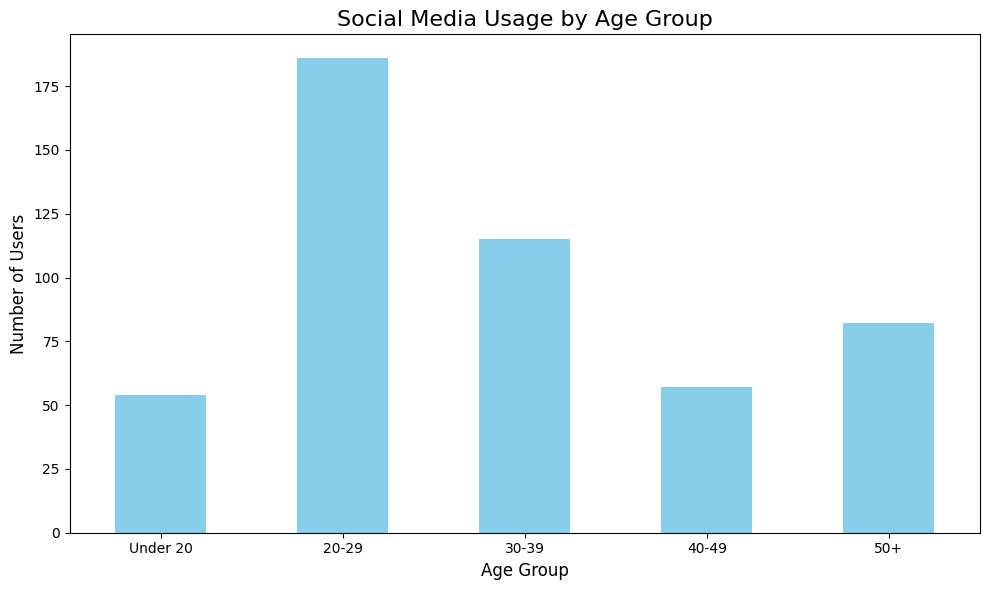

Age Group
Under 20     54
20-29       186
30-39       115
40-49        57
50+          82
Name: count, dtype: int64


In [120]:
social_media_users = df[df['social_media_use'] == 'Yes'].copy()

# Define age bins and labels
bins = [0, 19, 29, 39, 49, 100]
labels = ['Under 20', '20-29', '30-39', '40-49', '50+']

# Create a new column 'Age Group' by binning the 'Age' column
social_media_users['Age Group'] = pd.cut(social_media_users['age'], bins=bins, labels=labels, right=True)

# Count the number of users in each age group
age_group_counts = social_media_users['Age Group'].value_counts().sort_index()

# Create a bar chart
plt.figure(figsize=(10, 6))
age_group_counts.plot(kind='bar', color='skyblue')
plt.title('Social Media Usage by Age Group', fontsize=16)
plt.xlabel('Age Group', fontsize=12)
plt.ylabel('Number of Users', fontsize=12)
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

print(age_group_counts)

2.1 Using One Hot Encoding

In [121]:
df_final = df.copy()

# Identify the column to be encoded and replaced
platforms_column = 'platforms'

# Split the platforms and get a list of all unique platforms
all_platforms = df_final[platforms_column].str.split(', ').explode().str.strip().unique()

# Create one-hot encoded columns
for platform in all_platforms:
    if pd.notna(platform):
        df_final[platform] = df_final[platforms_column].apply(lambda x: 1 if pd.notna(x) and platform in x else 0)

df_final.head()

,age,gender,relationship,occupation,social_media_use,platforms,avg_time_per_day,feeling,feel_lonely,self_esteem,...,mental_health,Facebook,Instagram,YouTube,SnapChat,Twitter,Tik Tok,Discord,Reddit,
0,23,Male,In a relationship,Student,Yes,"Facebook, Instagram, YouTube",3,Indifferent,Sometimes,Sometimes,...,Yes,1,1,1,0,0,0,0,0,1
1,22,Female,Single,Student,Yes,"Facebook, YouTube",4,Stressed,Yes,Sometimes,...,Yes,1,0,1,0,0,0,0,0,1
2,23,Female,Single,Student,Yes,"Facebook, YouTube",4,Happy,Sometimes,Sometimes,...,No,1,0,1,0,0,0,0,0,1
3,23,Female,Married,Student,Yes,"Facebook, Instagram, YouTube, SnapChat",4,Happy,Yes,No,...,Yes,1,1,1,1,0,0,0,0,1
4,24,Male,Single,Student,Yes,"Facebook, Instagram, YouTube",5,Stressed,No,No,...,Yes,1,1,1,0,0,0,0,0,1


2.2 Apply PCA to combained all platforms

In [122]:
encoded_columns = [p for p in all_platforms if pd.notna(p)]
X = df_final[encoded_columns]

# Apply PCA to reduce the platforms to a single component
pca = PCA(n_components=1)
pca_result = pca.fit_transform(X)

# Drop the original platforms column and the one-hot encoded columns
df_final = df_final.drop(columns=[platforms_column] + encoded_columns)

# Create a new column with the PCA result
df_final['platforms'] = pca_result

# Get the list of current columns
cols = df_final.columns.tolist()

# Find the index for the 6th position (index 5)
pca_col = 'platforms'
pca_index = cols.index(pca_col)

# Remove the PCA column from its current position and insert it into the 6th position (index 5)
cols.insert(5, cols.pop(pca_index))

# Reorder the DataFrame columns
df_final = df_final[cols]

print(df_final.head())

   age  gender       relationship occupation social_media_use  platforms  \
0   23    Male  In a relationship    Student              Yes   0.364269   
1   22  Female             Single    Student              Yes   0.218691   
2   23  Female             Single    Student              Yes   0.218691   
3   23  Female            Married    Student              Yes   0.329773   
4   24    Male             Single    Student              Yes   0.364269   

   avg_time_per_day      feeling feel_lonely self_esteem affects_on_emotion  \
0                 3  Indifferent   Sometimes   Sometimes                Yes   
1                 4     Stressed         Yes   Sometimes                Yes   
2                 4        Happy   Sometimes   Sometimes          Sometimes   
3                 4        Happy         Yes          No                Yes   
4                 5     Stressed          No          No          Sometimes   

   social_media_connection use_immediate  sleeping_time  comparism  

In [123]:
df = df_final.copy()
df.head()

,age,gender,relationship,occupation,social_media_use,platforms,avg_time_per_day,feeling,feel_lonely,self_esteem,affects_on_emotion,social_media_connection,use_immediate,sleeping_time,comparism,distracted,daily_activities,mental_health
0,23,Male,In a relationship,Student,Yes,0.364269,3,Indifferent,Sometimes,Sometimes,Yes,3,Yes,9,2,1,2,Yes
1,22,Female,Single,Student,Yes,0.218691,4,Stressed,Yes,Sometimes,Yes,1,Yes,9,3,5,5,Yes
2,23,Female,Single,Student,Yes,0.218691,4,Happy,Sometimes,Sometimes,Sometimes,4,Yes,8,3,4,5,No
3,23,Female,Married,Student,Yes,0.329773,4,Happy,Yes,No,Yes,3,Yes,6,2,3,3,Yes
4,24,Male,Single,Student,Yes,0.364269,5,Stressed,No,No,Sometimes,2,Yes,9,3,4,2,Yes


2.3 Detect Outlier


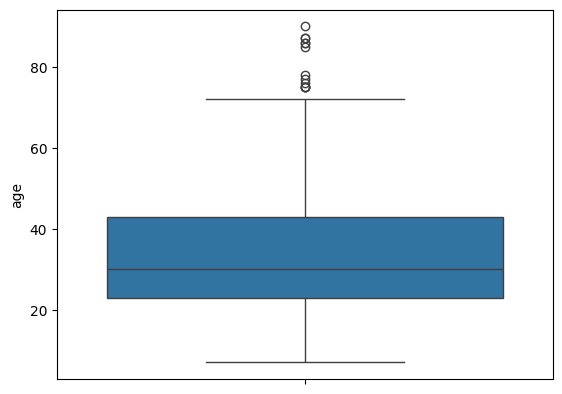

In [124]:
sns.boxplot(df['age'])
plt.show()

2.4 Remove Outlier Using IQR method

In [125]:
Q1 = df['age'].quantile(0.25)
Q3 = df['age'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
print(f"Lower Bound for age outliers: {lower_bound}")
print(f"Upper Bound for age outliers: {upper_bound}")

Lower Bound for age outliers: -7.0
Upper Bound for age outliers: 73.0


In [126]:
initial_rows = len(df)
df = df[(df['age'] >= lower_bound) & (df['age'] <= upper_bound)]
rows_dropped = initial_rows - len(df)
print(f"Number of rows dropped due to age outliers: {rows_dropped}")
print(f"New number of rows in the dataset: {len(df)}")
print(f"Age range after dropping outliers: {df['age'].min()} to {df['age'].max()}")


Number of rows dropped due to age outliers: 13
New number of rows in the dataset: 505
Age range after dropping outliers: 7 to 72


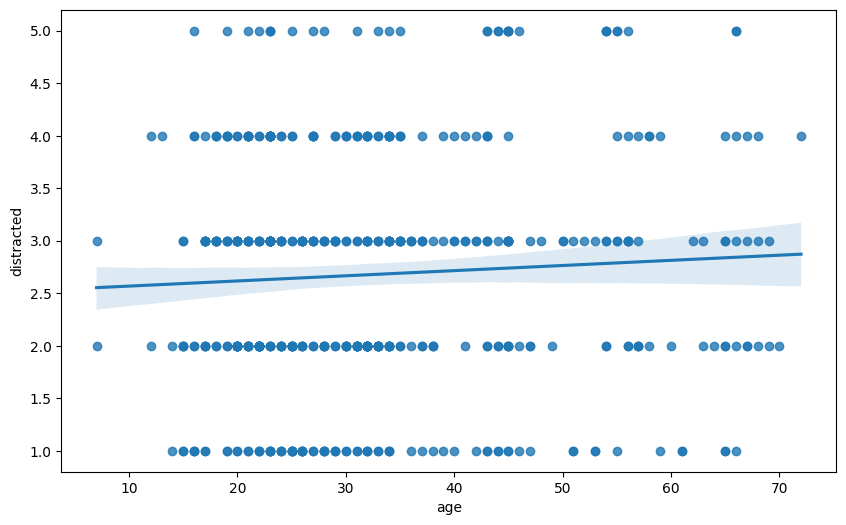

In [127]:
fig, ax = plt.subplots(figsize=(10,6))
sns.regplot(x= df.age, y= df.distracted, ax=ax);


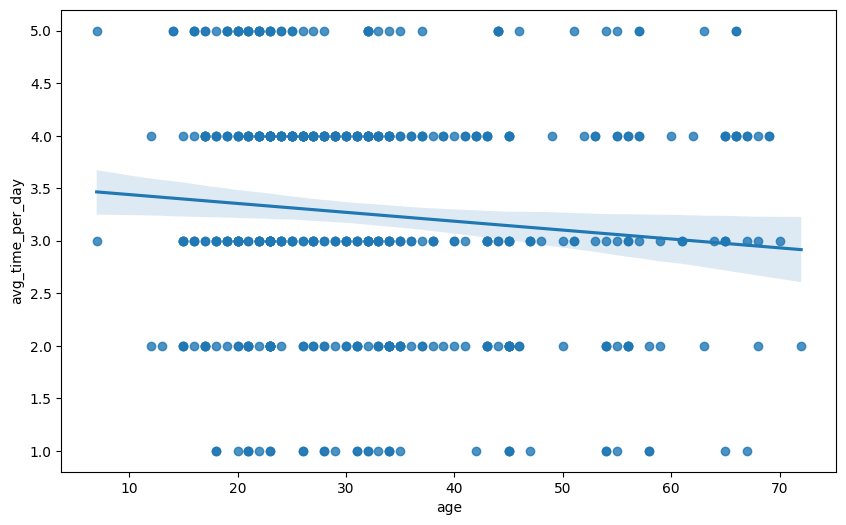

In [128]:
fig, ax = plt.subplots(figsize=(10,6))
sns.regplot(x= df.age, y= df.avg_time_per_day, ax=ax);

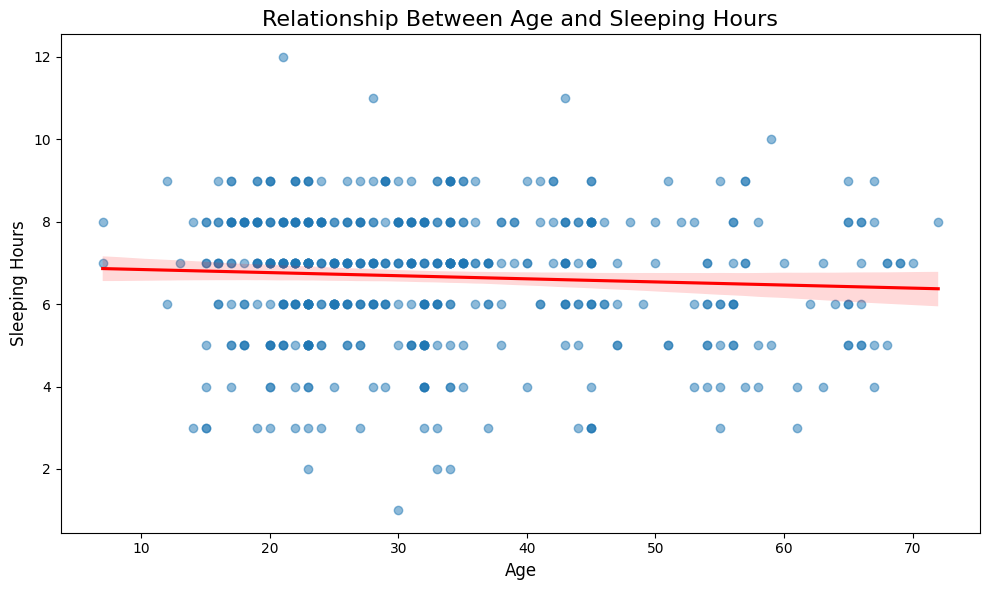

In [129]:
plt.figure(figsize=(10, 6))
sns.regplot(x='age', y='sleeping_time', data=df, scatter_kws={'alpha': 0.5}, line_kws={'color': 'red'})
plt.title('Relationship Between Age and Sleeping Hours', fontsize=16)
plt.xlabel('Age', fontsize=12)
plt.ylabel('Sleeping Hours', fontsize=12)
plt.tight_layout()
plt.show()

In [130]:
df['mental_health'] = df['mental_health'].str.strip()

# Get the value counts for the cleaned column
df.mental_health.value_counts()

,count
mental_health,
Yes,253
No,252


2.5 Using lable Encoding

In [131]:
column = ['gender','social_media_use','relationship', 'occupation', 'feeling', 'feel_lonely', 'self_esteem', 'affects_on_emotion', 'social_media_connection', 'use_immediate', 'mental_health']

In [132]:
label_encoders = {}
for col in column:
    if df[col].dtype == 'object':
        le = LabelEncoder()
        df[col] = le.fit_transform(df[col])
        label_encoders[col] = le

In [133]:
df.head()

,age,gender,relationship,occupation,social_media_use,platforms,avg_time_per_day,feeling,feel_lonely,self_esteem,affects_on_emotion,social_media_connection,use_immediate,sleeping_time,comparism,distracted,daily_activities,mental_health
0,23,1,1,3,1,0.364269,3,2,1,1,2,3,1,9,2,1,2,1
1,22,0,3,3,1,0.218691,4,3,2,1,2,1,1,9,3,5,5,1
2,23,0,3,3,1,0.218691,4,1,1,1,1,4,1,8,3,4,5,0
3,23,0,2,3,1,0.329773,4,1,2,0,2,3,1,6,2,3,3,1
4,24,1,3,3,1,0.364269,5,3,0,0,1,2,1,9,3,4,2,1


3.1 Correlation matrix

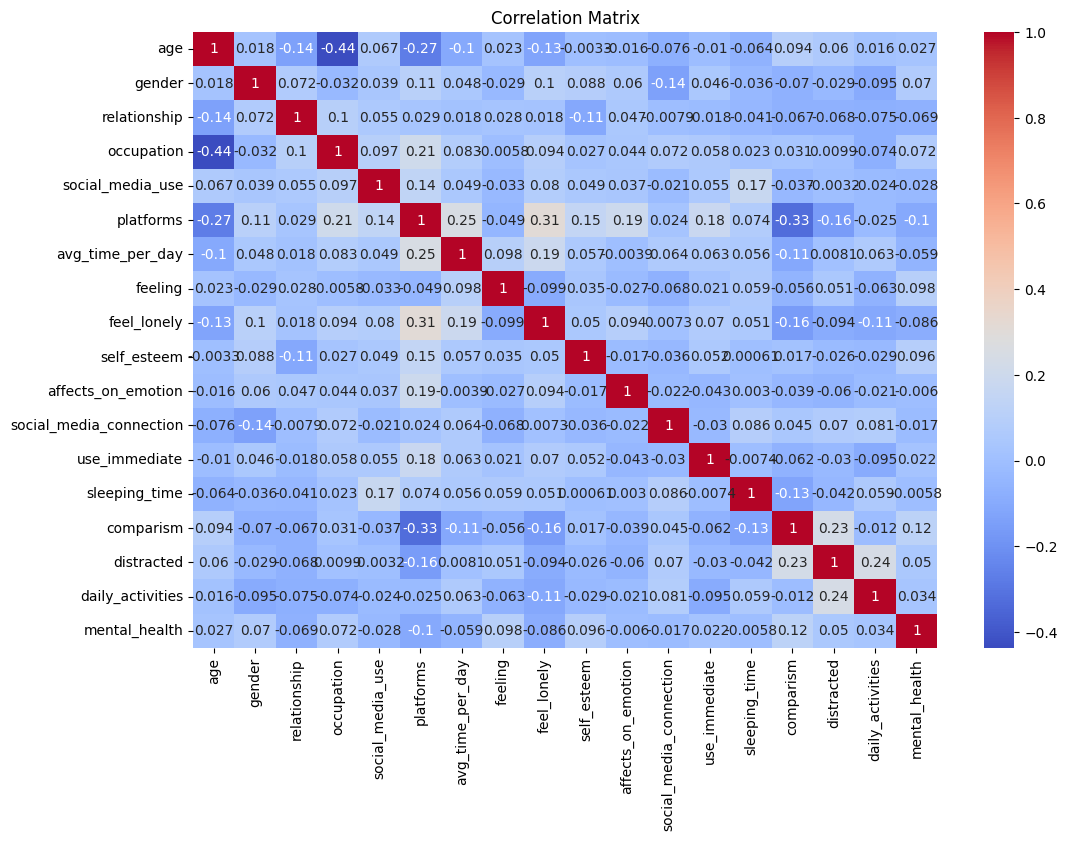

In [134]:
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

In [135]:
df = df.drop(columns=['gender','social_media_use','platforms','self_esteem','social_media_connection','use_immediate'])

3.2 Finding relation

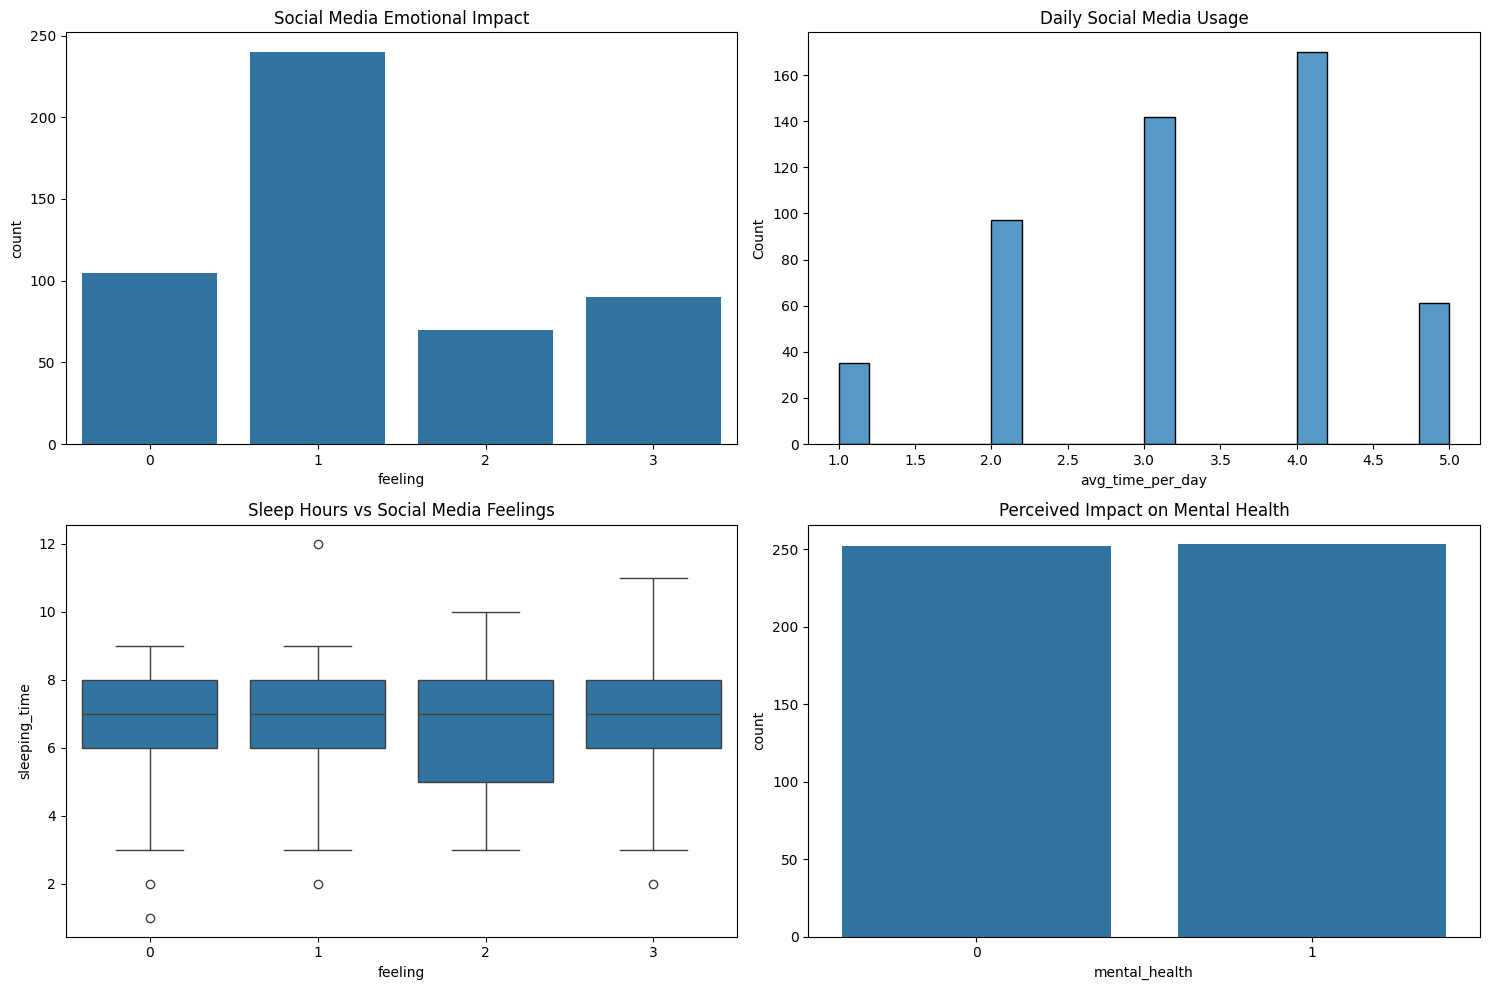

In [136]:
# Distribution of key variables
plt.figure(figsize=(15,10))
plt.subplot(2,2,1)
sns.countplot(x='feeling', data=df)
plt.title('Social Media Emotional Impact')

plt.subplot(2,2,2)
sns.histplot(df['avg_time_per_day'], bins=20)
plt.title('Daily Social Media Usage')

plt.subplot(2,2,3)
sns.boxplot(x='feeling',
            y='sleeping_time', data=df)
plt.title('Sleep Hours vs Social Media Feelings')

plt.subplot(2,2,4)
sns.countplot(x='mental_health', data=df)
plt.title('Perceived Impact on Mental Health')
plt.tight_layout()
plt.show()

In [137]:
df.head()

,age,relationship,occupation,avg_time_per_day,feeling,feel_lonely,affects_on_emotion,sleeping_time,comparism,distracted,daily_activities,mental_health
0,23,1,3,3,2,1,2,9,2,1,2,1
1,22,3,3,4,3,2,2,9,3,5,5,1
2,23,3,3,4,1,1,1,8,3,4,5,0
3,23,2,3,4,1,2,2,6,2,3,3,1
4,24,3,3,5,3,0,1,9,3,4,2,1


In [138]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import AdaBoostClassifier

4.1 Spliting Dataset

In [139]:
X = df.drop(['mental_health'], axis=1)
y = df['mental_health']

In [140]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

4.2 Fitting in Random Forest Model

In [141]:
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

4.3 Getting Accuracy

In [142]:
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

print("Accuracy:", accuracy)

Accuracy: 0.6732673267326733


5.1 Fitting in AdaBoost Model

In [143]:
ada_model = AdaBoostClassifier(
    n_estimators=100,
    learning_rate=1.0,
    random_state=42
)
ada_model.fit(X_train, y_train)

y_pred = ada_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("AdaBoost Accuracy:", accuracy)

AdaBoost Accuracy: 0.7128712871287128


Prediction

In [154]:
original_row = df.iloc[122]
print(f"Original Sample (Index 50):\n{original_row}")
print(f"Predicted Mental Health Status: {df['mental_health'][123]}")

Original Sample (Index 50):
age                   46
relationship           2
occupation             2
avg_time_per_day       2
feeling                0
feel_lonely            1
affects_on_emotion     2
sleeping_time          8
comparism              4
distracted             1
daily_activities       1
mental_health          1
Name: 123, dtype: int64
Predicted Mental Health Status: 1


Confusion Matrix

Confusion Matrix:
 [[40 18]
 [11 32]]


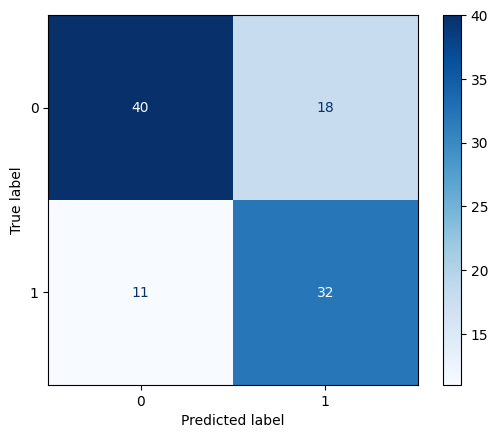

In [144]:
cm = confusion_matrix(y_test, y_pred)

# Display as text
print("Confusion Matrix:\n", cm)

# Display as a plot
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
disp.plot(cmap='Blues')

Clasification Report

In [145]:
print(classification_report(y_test , y_pred))

              precision    recall  f1-score   support

           0       0.78      0.69      0.73        58
           1       0.64      0.74      0.69        43

    accuracy                           0.71       101
   macro avg       0.71      0.72      0.71       101
weighted avg       0.72      0.71      0.71       101



Finding Error

In [146]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np

# Predict on test set
y_pred = ada_model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)

print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)
print("Mean Absolute Error (MAE):", mae)

Mean Squared Error (MSE): 0.2871287128712871
Root Mean Squared Error (RMSE): 0.5358439258508835
Mean Absolute Error (MAE): 0.2871287128712871


In [147]:
X = df.drop('mental_health', axis=1)
y = df['mental_health']

# Train/Test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "Gradient Boosting": GradientBoostingClassifier(),
    "Naive Bayes": GaussianNB(),
    "KNN": KNeighborsClassifier(),
    "SVM": SVC(),
    "AdaBoost": AdaBoostClassifier()
}


results = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    results[name] = acc

# Show results sorted by accuracy
results_df = pd.DataFrame(list(results.items()), columns=['Model', 'Accuracy'])
results_df = results_df.sort_values(by='Accuracy', ascending=False).reset_index(drop=True)

print(results_df)


                 Model  Accuracy
0             AdaBoost  0.702970
1        Random Forest  0.643564
2    Gradient Boosting  0.633663
3        Decision Tree  0.603960
4          Naive Bayes  0.584158
5  Logistic Regression  0.544554
6                  KNN  0.524752
7                  SVM  0.465347


Using XgBoost Model

In [148]:
import pandas as pd
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Train/Test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# XGBoost model
xgb_model = XGBClassifier(eval_metric='mlogloss', random_state=42)
xgb_model.fit(X_train, y_train)

# Prediction & Accuracy
y_pred = xgb_model.predict(X_test)
print("XGBoost Accuracy:", accuracy_score(y_test, y_pred))


XGBoost Accuracy: 0.6237623762376238


In [149]:
from sklearn.model_selection import cross_val_score
import numpy as np

# XGBoost model
xgb_model = XGBClassifier(eval_metric='mlogloss', random_state=42)

# Perform 5-Fold Cross Validation
cv_scores = cross_val_score(xgb_model, X, y, cv=5, scoring='accuracy')

print("CV Scores:", cv_scores)
print("Mean Accuracy:", np.mean(cv_scores))


CV Scores: [0.54455446 0.54455446 0.4950495  0.64356436 0.69306931]
Mean Accuracy: 0.5841584158415841


In [150]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(max_iter=1000)
rfe = RFE(model, n_features_to_select=5)
rfe.fit(X, y)

selected_features = X.columns[rfe.support_]
print("Selected important features:", selected_features.tolist())


Selected important features: ['relationship', 'occupation', 'feeling', 'feel_lonely', 'comparism']
